## Collider Cost Model

### By Carl A. Lindstrøm, University of Oslo (March 2024)

Import model and Bayesian Optimizer (Ax)

In [1]:
from collider_cost_model import ColliderCostModel
from ax import optimize
%load_ext autoreload
%autoreload 2

### Default colliders

Calculate, print and plot default colliders:

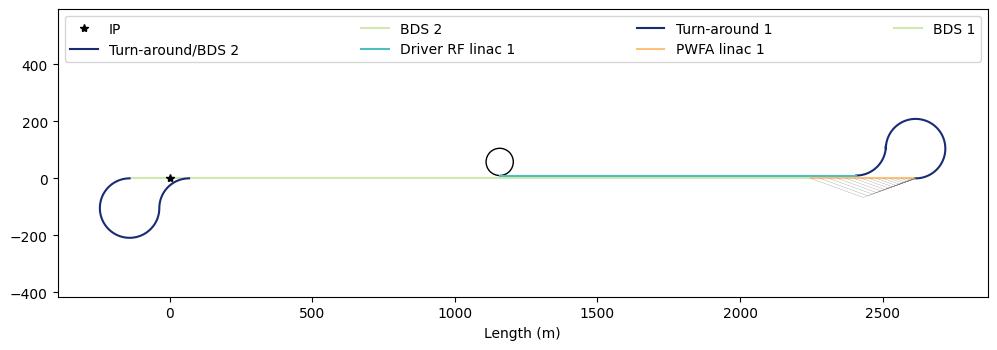

In [2]:
# instantiate collider
default_collider = ColliderCostModel()

# set default
#default_collider.set_as_HALHF(250e9)
default_collider.set_as_original_HALHF(250e9)
#default_collider.set_as_C3(250e9)
#default_collider.set_as_ILC(250e9)
#default_collider.set_as_pwfa_gammagamma(160e9)

# plot layout
default_collider.plot_layout()

In [3]:
# print everything
default_collider.print_all()


ELECTRON/POSITRON BUNCH PARAMETERS:
>> Electron final energy = 500.0 GeV
>> Positron final energy = 31.2 GeV
>> Electron charge = 1.60 nC
>> Positron charge = 6.41 nC
>> Electron norm. emittance = 160.0 x 0.56 mm mrad
>> Positron norm. emittance = 10.0 x 0.04 mm mrad
>> Number of bunches in train = 100
>> Bunch separation = 83.5 ns
>> Bunch train rep. rate = 100.0 Hz
>> Average collision rate = 10.0 kHz

PLASMA WAKE PARAMETERS:
>> Accelerating field          = 6.40 GV/m
>> Wake-to-beam efficiency     = 50%
>> Driver depletion efficiency = 75%
>> Longitudinal energy density = 20.5 J/m
>> Energy absorbed per length  = 10.3 J/m
>> Energy remaining per length = 10.3 J/m
>> Peak decelerating field     = 6.40 GV/m
>> Blowout radius              = 2.18 kp^-1
>> Plasma density              = 6.64e+15 cm^-3
>> Plasma skin depth           = 65 µm
>> Normalized field strength   = 0.82
>> Wavebreaking field          = 7.84 GV/m
>> Norm. transverse wakefield  = 0.125

DRIVE BUNCH PARAMETERS:
>> Dr

## Optimize colliders

Perform optimization

In [4]:
# choose machine type
machine_choice = ColliderCostModel.set_as_HALHF
#machine_choice = ColliderCostModel.set_as_original_HALHF
#machine_choice = ColliderCostModel.set_as_C3
#machine_choice = ColliderCostModel.set_as_ILC
#machine_choice = ColliderCostModel.set_as_pwfa_gammagamma

# choose energy
#energy_centerofmass = 160e9
energy_centerofmass = 250e9
#energy_centerofmass = 380e9
#energy_centerofmass = 500e9
#energy_centerofmass = 10e12

# merit function: Full Programme Cost
def full_programme_cost(params):
    collider = ColliderCostModel()
    machine_choice(collider, energy_centerofmass)
    #collider.combined_driver_positron_linac = True
    #collider.use_driver_turnaround = True
    collider.set_parameters(params)
    print(round(collider.cost_full_programme_with_carbon_tax/1e9, 2), 'BILCU <<', {key : round(params[key], 2) for key in params})
    return collider.cost_full_programme_with_carbon_tax

# perform optimization
best_parameters, best_values, experiment, model = optimize(
    parameters =[
        {'name': 'energy_asymmetry',                'bounds': [2.0, 4.0],     'type': 'range', 'log_scale': True},
        {'name': 'pwfa.num_stages',                 'bounds': [5, 100],       'type': 'range', 'log_scale': True},
        {'name': 'pwfa.accel_gradient',             'bounds': [0.1e9, 20e9],  'type': 'range', 'log_scale': True},
        {'name': 'pwfa.extraction_efficiency',      'bounds': [0.2, 0.6],     'type': 'range', 'log_scale': True},
        {'name': 'driver_linac.accel_gradient',     'bounds': [1e6, 33e6],    'type': 'range', 'log_scale': True},
        {'name': 'bunch_pattern.reprate_trains',    'bounds': [5, 200],       'type': 'range', 'log_scale': True},
        {'name': 'bunch_pattern.bunches_per_train', 'bounds': [5, 200],       'type': 'range', 'log_scale': True},
    ],
    evaluation_function = full_programme_cost,
    minimize = True,
    total_trials = 80
)

[INFO 04-03 23:37:56] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter energy_asymmetry. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-03 23:37:56] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter pwfa.num_stages. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-03 23:37:56] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter pwfa.accel_gradient. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-03 23:37:56] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter pwfa.extraction_efficiency. If that is not the expected value type, you can explicitly specify 'value_t

312.9 BILCU << {'energy_asymmetry': 2.68, 'pwfa.num_stages': 5, 'pwfa.accel_gradient': 2872201180.23, 'pwfa.extraction_efficiency': 0.5, 'driver_linac.accel_gradient': 1079469.25, 'bunch_pattern.reprate_trains': 7, 'bunch_pattern.bunches_per_train': 27}
14.29 BILCU << {'energy_asymmetry': 3.57, 'pwfa.num_stages': 27, 'pwfa.accel_gradient': 19358873331.93, 'pwfa.extraction_efficiency': 0.21, 'driver_linac.accel_gradient': 1995668.43, 'bunch_pattern.reprate_trains': 17, 'bunch_pattern.bunches_per_train': 158}
17.86 BILCU << {'energy_asymmetry': 3.97, 'pwfa.num_stages': 12, 'pwfa.accel_gradient': 513715384.25, 'pwfa.extraction_efficiency': 0.36, 'driver_linac.accel_gradient': 3293812.77, 'bunch_pattern.reprate_trains': 193, 'bunch_pattern.bunches_per_train': 11}
7.88 BILCU << {'energy_asymmetry': 2.17, 'pwfa.num_stages': 8, 'pwfa.accel_gradient': 158539869.15, 'pwfa.extraction_efficiency': 0.38, 'driver_linac.accel_gradient': 32400837.46, 'bunch_pattern.reprate_trains': 200, 'bunch_patter

[INFO 04-03 23:37:57] ax.service.managed_loop: Running optimization trial 9...
[INFO 04-03 23:37:57] ax.service.managed_loop: Running optimization trial 10...


16.25 BILCU << {'energy_asymmetry': 2.7, 'pwfa.num_stages': 67, 'pwfa.accel_gradient': 1666348781.41, 'pwfa.extraction_efficiency': 0.31, 'driver_linac.accel_gradient': 4624949.96, 'bunch_pattern.reprate_trains': 13, 'bunch_pattern.bunches_per_train': 37}
5.84 BILCU << {'energy_asymmetry': 2.76, 'pwfa.num_stages': 9, 'pwfa.accel_gradient': 8315563809.39, 'pwfa.extraction_efficiency': 0.25, 'driver_linac.accel_gradient': 19601672.08, 'bunch_pattern.reprate_trains': 87, 'bunch_pattern.bunches_per_train': 56}
12.15 BILCU << {'energy_asymmetry': 2.0, 'pwfa.num_stages': 43, 'pwfa.accel_gradient': 19114159738.71, 'pwfa.extraction_efficiency': 0.21, 'driver_linac.accel_gradient': 26583184.19, 'bunch_pattern.reprate_trains': 119, 'bunch_pattern.bunches_per_train': 15}


[INFO 04-03 23:37:57] ax.service.managed_loop: Running optimization trial 11...
[INFO 04-03 23:37:57] ax.service.managed_loop: Running optimization trial 12...
[INFO 04-03 23:37:57] ax.service.managed_loop: Running optimization trial 13...
[INFO 04-03 23:37:57] ax.service.managed_loop: Running optimization trial 14...
[INFO 04-03 23:37:57] ax.service.managed_loop: Running optimization trial 15...


5.99 BILCU << {'energy_asymmetry': 2.41, 'pwfa.num_stages': 18, 'pwfa.accel_gradient': 3961736181.92, 'pwfa.extraction_efficiency': 0.41, 'driver_linac.accel_gradient': 5843478.32, 'bunch_pattern.reprate_trains': 138, 'bunch_pattern.bunches_per_train': 40}
99.42 BILCU << {'energy_asymmetry': 3.23, 'pwfa.num_stages': 9, 'pwfa.accel_gradient': 165837607.65, 'pwfa.extraction_efficiency': 0.28, 'driver_linac.accel_gradient': 11153524.22, 'bunch_pattern.reprate_trains': 12, 'bunch_pattern.bunches_per_train': 5}
50.94 BILCU << {'energy_asymmetry': 2.69, 'pwfa.num_stages': 45, 'pwfa.accel_gradient': 187337030.08, 'pwfa.extraction_efficiency': 0.6, 'driver_linac.accel_gradient': 23501529.66, 'bunch_pattern.reprate_trains': 29, 'bunch_pattern.bunches_per_train': 6}
24.04 BILCU << {'energy_asymmetry': 3.33, 'pwfa.num_stages': 10, 'pwfa.accel_gradient': 2393292435.98, 'pwfa.extraction_efficiency': 0.39, 'driver_linac.accel_gradient': 20296298.83, 'bunch_pattern.reprate_trains': 40, 'bunch_pattern

[INFO 04-03 23:37:57] ax.service.managed_loop: Running optimization trial 16...


5.5 BILCU << {'energy_asymmetry': 2.51, 'pwfa.num_stages': 21, 'pwfa.accel_gradient': 3997726787.01, 'pwfa.extraction_efficiency': 0.3, 'driver_linac.accel_gradient': 16263939.31, 'bunch_pattern.reprate_trains': 124, 'bunch_pattern.bunches_per_train': 29}


[INFO 04-03 23:37:58] ax.service.managed_loop: Running optimization trial 17...


5.81 BILCU << {'energy_asymmetry': 2.61, 'pwfa.num_stages': 10, 'pwfa.accel_gradient': 1106232682.64, 'pwfa.extraction_efficiency': 0.38, 'driver_linac.accel_gradient': 16242941.57, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 36}


[INFO 04-03 23:37:59] ax.service.managed_loop: Running optimization trial 18...


7.15 BILCU << {'energy_asymmetry': 2.9, 'pwfa.num_stages': 35, 'pwfa.accel_gradient': 8696924578.52, 'pwfa.extraction_efficiency': 0.27, 'driver_linac.accel_gradient': 6951591.22, 'bunch_pattern.reprate_trains': 61, 'bunch_pattern.bunches_per_train': 55}


[INFO 04-03 23:37:59] ax.service.managed_loop: Running optimization trial 19...


5.42 BILCU << {'energy_asymmetry': 2.2, 'pwfa.num_stages': 16, 'pwfa.accel_gradient': 1312271269.79, 'pwfa.extraction_efficiency': 0.31, 'driver_linac.accel_gradient': 11597047.92, 'bunch_pattern.reprate_trains': 187, 'bunch_pattern.bunches_per_train': 68}


[INFO 04-03 23:38:00] ax.service.managed_loop: Running optimization trial 20...


6.69 BILCU << {'energy_asymmetry': 2.7, 'pwfa.num_stages': 14, 'pwfa.accel_gradient': 5389020749.05, 'pwfa.extraction_efficiency': 0.27, 'driver_linac.accel_gradient': 5795355.24, 'bunch_pattern.reprate_trains': 181, 'bunch_pattern.bunches_per_train': 40}


[INFO 04-03 23:38:01] ax.service.managed_loop: Running optimization trial 21...


4.96 BILCU << {'energy_asymmetry': 2.69, 'pwfa.num_stages': 17, 'pwfa.accel_gradient': 5468195945.99, 'pwfa.extraction_efficiency': 0.33, 'driver_linac.accel_gradient': 17689794.56, 'bunch_pattern.reprate_trains': 154, 'bunch_pattern.bunches_per_train': 100}


[INFO 04-03 23:38:02] ax.service.managed_loop: Running optimization trial 22...


5.53 BILCU << {'energy_asymmetry': 2.15, 'pwfa.num_stages': 10, 'pwfa.accel_gradient': 5257567585.52, 'pwfa.extraction_efficiency': 0.35, 'driver_linac.accel_gradient': 23100153.53, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 45}


[INFO 04-03 23:38:03] ax.service.managed_loop: Running optimization trial 23...


5.42 BILCU << {'energy_asymmetry': 2.38, 'pwfa.num_stages': 24, 'pwfa.accel_gradient': 3299923692.87, 'pwfa.extraction_efficiency': 0.37, 'driver_linac.accel_gradient': 15208706.89, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 47}


[INFO 04-03 23:38:04] ax.service.managed_loop: Running optimization trial 24...


5.16 BILCU << {'energy_asymmetry': 2.45, 'pwfa.num_stages': 11, 'pwfa.accel_gradient': 3912685828.13, 'pwfa.extraction_efficiency': 0.31, 'driver_linac.accel_gradient': 14577920.68, 'bunch_pattern.reprate_trains': 122, 'bunch_pattern.bunches_per_train': 70}


[INFO 04-03 23:38:05] ax.service.managed_loop: Running optimization trial 25...


5.13 BILCU << {'energy_asymmetry': 2.6, 'pwfa.num_stages': 10, 'pwfa.accel_gradient': 2304006618.43, 'pwfa.extraction_efficiency': 0.27, 'driver_linac.accel_gradient': 33000000.0, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 68}


[INFO 04-03 23:38:06] ax.service.managed_loop: Running optimization trial 26...


5.4 BILCU << {'energy_asymmetry': 2.67, 'pwfa.num_stages': 18, 'pwfa.accel_gradient': 12774167484.21, 'pwfa.extraction_efficiency': 0.26, 'driver_linac.accel_gradient': 23947521.6, 'bunch_pattern.reprate_trains': 128, 'bunch_pattern.bunches_per_train': 79}


[INFO 04-03 23:38:07] ax.service.managed_loop: Running optimization trial 27...


5.11 BILCU << {'energy_asymmetry': 2.83, 'pwfa.num_stages': 19, 'pwfa.accel_gradient': 2586877576.83, 'pwfa.extraction_efficiency': 0.26, 'driver_linac.accel_gradient': 18533839.56, 'bunch_pattern.reprate_trains': 117, 'bunch_pattern.bunches_per_train': 87}


[INFO 04-03 23:38:08] ax.service.managed_loop: Running optimization trial 28...


5.08 BILCU << {'energy_asymmetry': 2.76, 'pwfa.num_stages': 14, 'pwfa.accel_gradient': 5063764651.77, 'pwfa.extraction_efficiency': 0.3, 'driver_linac.accel_gradient': 21315662.62, 'bunch_pattern.reprate_trains': 149, 'bunch_pattern.bunches_per_train': 58}


[INFO 04-03 23:38:09] ax.service.managed_loop: Running optimization trial 29...


5.03 BILCU << {'energy_asymmetry': 2.43, 'pwfa.num_stages': 10, 'pwfa.accel_gradient': 1426014453.12, 'pwfa.extraction_efficiency': 0.36, 'driver_linac.accel_gradient': 25725179.28, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 112}


[INFO 04-03 23:38:10] ax.service.managed_loop: Running optimization trial 30...


5.61 BILCU << {'energy_asymmetry': 2.83, 'pwfa.num_stages': 9, 'pwfa.accel_gradient': 5198725284.87, 'pwfa.extraction_efficiency': 0.26, 'driver_linac.accel_gradient': 24833916.04, 'bunch_pattern.reprate_trains': 128, 'bunch_pattern.bunches_per_train': 200}


[INFO 04-03 23:38:12] ax.service.managed_loop: Running optimization trial 31...


5.01 BILCU << {'energy_asymmetry': 2.43, 'pwfa.num_stages': 11, 'pwfa.accel_gradient': 1965007483.03, 'pwfa.extraction_efficiency': 0.33, 'driver_linac.accel_gradient': 18267529.93, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 63}


[INFO 04-03 23:38:13] ax.service.managed_loop: Running optimization trial 32...


4.91 BILCU << {'energy_asymmetry': 2.55, 'pwfa.num_stages': 15, 'pwfa.accel_gradient': 2696852720.57, 'pwfa.extraction_efficiency': 0.31, 'driver_linac.accel_gradient': 33000000.0, 'bunch_pattern.reprate_trains': 131, 'bunch_pattern.bunches_per_train': 111}


[INFO 04-03 23:38:14] ax.service.managed_loop: Running optimization trial 33...


5.59 BILCU << {'energy_asymmetry': 2.51, 'pwfa.num_stages': 33, 'pwfa.accel_gradient': 2823023396.08, 'pwfa.extraction_efficiency': 0.31, 'driver_linac.accel_gradient': 8958620.11, 'bunch_pattern.reprate_trains': 104, 'bunch_pattern.bunches_per_train': 165}


[INFO 04-03 23:38:15] ax.service.managed_loop: Running optimization trial 34...


5.44 BILCU << {'energy_asymmetry': 2.69, 'pwfa.num_stages': 18, 'pwfa.accel_gradient': 919819625.35, 'pwfa.extraction_efficiency': 0.31, 'driver_linac.accel_gradient': 22941692.35, 'bunch_pattern.reprate_trains': 197, 'bunch_pattern.bunches_per_train': 165}


[INFO 04-03 23:38:17] ax.service.managed_loop: Running optimization trial 35...


4.92 BILCU << {'energy_asymmetry': 2.61, 'pwfa.num_stages': 18, 'pwfa.accel_gradient': 2804570868.54, 'pwfa.extraction_efficiency': 0.3, 'driver_linac.accel_gradient': 18495209.29, 'bunch_pattern.reprate_trains': 138, 'bunch_pattern.bunches_per_train': 88}


[INFO 04-03 23:38:18] ax.service.managed_loop: Running optimization trial 36...


5.08 BILCU << {'energy_asymmetry': 2.67, 'pwfa.num_stages': 9, 'pwfa.accel_gradient': 3332099683.47, 'pwfa.extraction_efficiency': 0.34, 'driver_linac.accel_gradient': 33000000.0, 'bunch_pattern.reprate_trains': 174, 'bunch_pattern.bunches_per_train': 105}


[INFO 04-03 23:38:20] ax.service.managed_loop: Running optimization trial 37...


5.22 BILCU << {'energy_asymmetry': 2.78, 'pwfa.num_stages': 23, 'pwfa.accel_gradient': 6302297837.56, 'pwfa.extraction_efficiency': 0.31, 'driver_linac.accel_gradient': 22605246.23, 'bunch_pattern.reprate_trains': 99, 'bunch_pattern.bunches_per_train': 123}


[INFO 04-03 23:38:21] ax.service.managed_loop: Running optimization trial 38...


5.22 BILCU << {'energy_asymmetry': 2.39, 'pwfa.num_stages': 15, 'pwfa.accel_gradient': 4482107349.83, 'pwfa.extraction_efficiency': 0.35, 'driver_linac.accel_gradient': 25866279.23, 'bunch_pattern.reprate_trains': 185, 'bunch_pattern.bunches_per_train': 200}


[INFO 04-03 23:38:22] ax.service.managed_loop: Running optimization trial 39...


4.82 BILCU << {'energy_asymmetry': 2.46, 'pwfa.num_stages': 14, 'pwfa.accel_gradient': 2760821482.61, 'pwfa.extraction_efficiency': 0.34, 'driver_linac.accel_gradient': 33000000.0, 'bunch_pattern.reprate_trains': 170, 'bunch_pattern.bunches_per_train': 74}


[INFO 04-03 23:38:23] ax.service.managed_loop: Running optimization trial 40...


4.9 BILCU << {'energy_asymmetry': 2.4, 'pwfa.num_stages': 17, 'pwfa.accel_gradient': 2535476802.82, 'pwfa.extraction_efficiency': 0.41, 'driver_linac.accel_gradient': 17907535.81, 'bunch_pattern.reprate_trains': 149, 'bunch_pattern.bunches_per_train': 123}


[INFO 04-03 23:38:24] ax.service.managed_loop: Running optimization trial 41...


5.68 BILCU << {'energy_asymmetry': 2.39, 'pwfa.num_stages': 10, 'pwfa.accel_gradient': 6606825892.2, 'pwfa.extraction_efficiency': 0.46, 'driver_linac.accel_gradient': 24487386.36, 'bunch_pattern.reprate_trains': 186, 'bunch_pattern.bunches_per_train': 94}


[INFO 04-03 23:38:26] ax.service.managed_loop: Running optimization trial 42...


5.01 BILCU << {'energy_asymmetry': 2.57, 'pwfa.num_stages': 22, 'pwfa.accel_gradient': 2438670804.88, 'pwfa.extraction_efficiency': 0.37, 'driver_linac.accel_gradient': 29362865.49, 'bunch_pattern.reprate_trains': 165, 'bunch_pattern.bunches_per_train': 135}


[INFO 04-03 23:38:27] ax.service.managed_loop: Running optimization trial 43...


4.79 BILCU << {'energy_asymmetry': 2.46, 'pwfa.num_stages': 15, 'pwfa.accel_gradient': 2512962393.95, 'pwfa.extraction_efficiency': 0.35, 'driver_linac.accel_gradient': 21593283.99, 'bunch_pattern.reprate_trains': 156, 'bunch_pattern.bunches_per_train': 93}


[INFO 04-03 23:38:28] ax.service.managed_loop: Running optimization trial 44...


5.16 BILCU << {'energy_asymmetry': 2.31, 'pwfa.num_stages': 14, 'pwfa.accel_gradient': 2070376530.16, 'pwfa.extraction_efficiency': 0.36, 'driver_linac.accel_gradient': 22098525.02, 'bunch_pattern.reprate_trains': 157, 'bunch_pattern.bunches_per_train': 81}


[INFO 04-03 23:38:30] ax.service.managed_loop: Running optimization trial 45...


4.81 BILCU << {'energy_asymmetry': 2.56, 'pwfa.num_stages': 15, 'pwfa.accel_gradient': 3258518015.11, 'pwfa.extraction_efficiency': 0.34, 'driver_linac.accel_gradient': 26040679.09, 'bunch_pattern.reprate_trains': 159, 'bunch_pattern.bunches_per_train': 87}


[INFO 04-03 23:38:31] ax.service.managed_loop: Running optimization trial 46...


5.29 BILCU << {'energy_asymmetry': 2.51, 'pwfa.num_stages': 17, 'pwfa.accel_gradient': 2067898076.17, 'pwfa.extraction_efficiency': 0.39, 'driver_linac.accel_gradient': 11829861.46, 'bunch_pattern.reprate_trains': 163, 'bunch_pattern.bunches_per_train': 162}


[INFO 04-03 23:38:32] ax.service.managed_loop: Running optimization trial 47...


4.86 BILCU << {'energy_asymmetry': 2.53, 'pwfa.num_stages': 20, 'pwfa.accel_gradient': 4285028803.14, 'pwfa.extraction_efficiency': 0.36, 'driver_linac.accel_gradient': 19984205.72, 'bunch_pattern.reprate_trains': 127, 'bunch_pattern.bunches_per_train': 91}


[INFO 04-03 23:38:34] ax.service.managed_loop: Running optimization trial 48...


4.82 BILCU << {'energy_asymmetry': 2.5, 'pwfa.num_stages': 14, 'pwfa.accel_gradient': 2819908533.06, 'pwfa.extraction_efficiency': 0.33, 'driver_linac.accel_gradient': 29775431.46, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 95}


[INFO 04-03 23:38:35] ax.service.managed_loop: Running optimization trial 49...


4.88 BILCU << {'energy_asymmetry': 2.59, 'pwfa.num_stages': 14, 'pwfa.accel_gradient': 1889291095.2, 'pwfa.extraction_efficiency': 0.33, 'driver_linac.accel_gradient': 33000000.0, 'bunch_pattern.reprate_trains': 170, 'bunch_pattern.bunches_per_train': 81}


[INFO 04-03 23:38:38] ax.service.managed_loop: Running optimization trial 50...


4.91 BILCU << {'energy_asymmetry': 2.54, 'pwfa.num_stages': 15, 'pwfa.accel_gradient': 2975580848.68, 'pwfa.extraction_efficiency': 0.36, 'driver_linac.accel_gradient': 23885872.85, 'bunch_pattern.reprate_trains': 133, 'bunch_pattern.bunches_per_train': 128}


[INFO 04-03 23:38:40] ax.service.managed_loop: Running optimization trial 51...


4.84 BILCU << {'energy_asymmetry': 2.55, 'pwfa.num_stages': 17, 'pwfa.accel_gradient': 3709537686.63, 'pwfa.extraction_efficiency': 0.32, 'driver_linac.accel_gradient': 26017527.44, 'bunch_pattern.reprate_trains': 157, 'bunch_pattern.bunches_per_train': 82}


[INFO 04-03 23:38:42] ax.service.managed_loop: Running optimization trial 52...


4.83 BILCU << {'energy_asymmetry': 2.51, 'pwfa.num_stages': 13, 'pwfa.accel_gradient': 2941105454.82, 'pwfa.extraction_efficiency': 0.32, 'driver_linac.accel_gradient': 26590653.28, 'bunch_pattern.reprate_trains': 169, 'bunch_pattern.bunches_per_train': 88}


[INFO 04-03 23:38:44] ax.service.managed_loop: Running optimization trial 53...


4.78 BILCU << {'energy_asymmetry': 2.49, 'pwfa.num_stages': 16, 'pwfa.accel_gradient': 2874595684.23, 'pwfa.extraction_efficiency': 0.37, 'driver_linac.accel_gradient': 23428209.81, 'bunch_pattern.reprate_trains': 177, 'bunch_pattern.bunches_per_train': 96}


[INFO 04-03 23:38:46] ax.service.managed_loop: Running optimization trial 54...


4.78 BILCU << {'energy_asymmetry': 2.48, 'pwfa.num_stages': 17, 'pwfa.accel_gradient': 2542546142.43, 'pwfa.extraction_efficiency': 0.35, 'driver_linac.accel_gradient': 25417691.92, 'bunch_pattern.reprate_trains': 163, 'bunch_pattern.bunches_per_train': 97}


[INFO 04-03 23:38:47] ax.service.managed_loop: Running optimization trial 55...


5.06 BILCU << {'energy_asymmetry': 2.82, 'pwfa.num_stages': 19, 'pwfa.accel_gradient': 3882607473.74, 'pwfa.extraction_efficiency': 0.29, 'driver_linac.accel_gradient': 33000000.0, 'bunch_pattern.reprate_trains': 193, 'bunch_pattern.bunches_per_train': 102}


[INFO 04-03 23:38:49] ax.service.managed_loop: Running optimization trial 56...


4.77 BILCU << {'energy_asymmetry': 2.51, 'pwfa.num_stages': 17, 'pwfa.accel_gradient': 2615856429.21, 'pwfa.extraction_efficiency': 0.37, 'driver_linac.accel_gradient': 23485517.91, 'bunch_pattern.reprate_trains': 149, 'bunch_pattern.bunches_per_train': 80}


[INFO 04-03 23:38:50] ax.service.managed_loop: Running optimization trial 57...


4.78 BILCU << {'energy_asymmetry': 2.5, 'pwfa.num_stages': 15, 'pwfa.accel_gradient': 2497046526.2, 'pwfa.extraction_efficiency': 0.37, 'driver_linac.accel_gradient': 27500152.43, 'bunch_pattern.reprate_trains': 170, 'bunch_pattern.bunches_per_train': 86}


[INFO 04-03 23:38:52] ax.service.managed_loop: Running optimization trial 58...


4.89 BILCU << {'energy_asymmetry': 2.68, 'pwfa.num_stages': 18, 'pwfa.accel_gradient': 3326697669.47, 'pwfa.extraction_efficiency': 0.35, 'driver_linac.accel_gradient': 27522640.37, 'bunch_pattern.reprate_trains': 124, 'bunch_pattern.bunches_per_train': 72}


[INFO 04-03 23:38:55] ax.service.managed_loop: Running optimization trial 59...


4.79 BILCU << {'energy_asymmetry': 2.5, 'pwfa.num_stages': 16, 'pwfa.accel_gradient': 2577891140.73, 'pwfa.extraction_efficiency': 0.35, 'driver_linac.accel_gradient': 23581131.11, 'bunch_pattern.reprate_trains': 174, 'bunch_pattern.bunches_per_train': 81}


[INFO 04-03 23:38:57] ax.service.managed_loop: Running optimization trial 60...


4.78 BILCU << {'energy_asymmetry': 2.49, 'pwfa.num_stages': 17, 'pwfa.accel_gradient': 2755254475.83, 'pwfa.extraction_efficiency': 0.36, 'driver_linac.accel_gradient': 24034864.29, 'bunch_pattern.reprate_trains': 130, 'bunch_pattern.bunches_per_train': 85}


[INFO 04-03 23:39:00] ax.service.managed_loop: Running optimization trial 61...


4.78 BILCU << {'energy_asymmetry': 2.48, 'pwfa.num_stages': 18, 'pwfa.accel_gradient': 2503707093.97, 'pwfa.extraction_efficiency': 0.37, 'driver_linac.accel_gradient': 20708385.55, 'bunch_pattern.reprate_trains': 147, 'bunch_pattern.bunches_per_train': 94}


[INFO 04-03 23:39:02] ax.service.managed_loop: Running optimization trial 62...


4.91 BILCU << {'energy_asymmetry': 2.56, 'pwfa.num_stages': 15, 'pwfa.accel_gradient': 3493553840.26, 'pwfa.extraction_efficiency': 0.37, 'driver_linac.accel_gradient': 33000000.0, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 63}


[INFO 04-03 23:39:06] ax.service.managed_loop: Running optimization trial 63...


4.78 BILCU << {'energy_asymmetry': 2.5, 'pwfa.num_stages': 16, 'pwfa.accel_gradient': 2441373278.41, 'pwfa.extraction_efficiency': 0.37, 'driver_linac.accel_gradient': 23112639.74, 'bunch_pattern.reprate_trains': 148, 'bunch_pattern.bunches_per_train': 90}


[INFO 04-03 23:39:10] ax.service.managed_loop: Running optimization trial 64...


4.77 BILCU << {'energy_asymmetry': 2.47, 'pwfa.num_stages': 18, 'pwfa.accel_gradient': 2814627303.81, 'pwfa.extraction_efficiency': 0.37, 'driver_linac.accel_gradient': 22228246.12, 'bunch_pattern.reprate_trains': 155, 'bunch_pattern.bunches_per_train': 89}


[INFO 04-03 23:39:12] ax.service.managed_loop: Running optimization trial 65...


4.81 BILCU << {'energy_asymmetry': 2.45, 'pwfa.num_stages': 19, 'pwfa.accel_gradient': 2907815040.45, 'pwfa.extraction_efficiency': 0.35, 'driver_linac.accel_gradient': 19331887.18, 'bunch_pattern.reprate_trains': 159, 'bunch_pattern.bunches_per_train': 100}


[INFO 04-03 23:39:15] ax.service.managed_loop: Running optimization trial 66...


4.87 BILCU << {'energy_asymmetry': 2.72, 'pwfa.num_stages': 16, 'pwfa.accel_gradient': 3079937562.85, 'pwfa.extraction_efficiency': 0.33, 'driver_linac.accel_gradient': 23170641.59, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 91}


[INFO 04-03 23:39:18] ax.service.managed_loop: Running optimization trial 67...


4.77 BILCU << {'energy_asymmetry': 2.47, 'pwfa.num_stages': 18, 'pwfa.accel_gradient': 2695312405.38, 'pwfa.extraction_efficiency': 0.39, 'driver_linac.accel_gradient': 23229431.89, 'bunch_pattern.reprate_trains': 148, 'bunch_pattern.bunches_per_train': 94}


[INFO 04-03 23:39:21] ax.service.managed_loop: Running optimization trial 68...


4.84 BILCU << {'energy_asymmetry': 2.44, 'pwfa.num_stages': 22, 'pwfa.accel_gradient': 2577861873.53, 'pwfa.extraction_efficiency': 0.39, 'driver_linac.accel_gradient': 21839991.52, 'bunch_pattern.reprate_trains': 107, 'bunch_pattern.bunches_per_train': 102}


[INFO 04-03 23:39:24] ax.service.managed_loop: Running optimization trial 69...


4.77 BILCU << {'energy_asymmetry': 2.46, 'pwfa.num_stages': 18, 'pwfa.accel_gradient': 2381800342.88, 'pwfa.extraction_efficiency': 0.38, 'driver_linac.accel_gradient': 23042546.2, 'bunch_pattern.reprate_trains': 184, 'bunch_pattern.bunches_per_train': 95}


[INFO 04-03 23:39:28] ax.service.managed_loop: Running optimization trial 70...


4.79 BILCU << {'energy_asymmetry': 2.47, 'pwfa.num_stages': 20, 'pwfa.accel_gradient': 2830104052.8, 'pwfa.extraction_efficiency': 0.4, 'driver_linac.accel_gradient': 22060249.8, 'bunch_pattern.reprate_trains': 185, 'bunch_pattern.bunches_per_train': 97}


[INFO 04-03 23:39:32] ax.service.managed_loop: Running optimization trial 71...


4.76 BILCU << {'energy_asymmetry': 2.47, 'pwfa.num_stages': 18, 'pwfa.accel_gradient': 2511273904.13, 'pwfa.extraction_efficiency': 0.38, 'driver_linac.accel_gradient': 23239904.05, 'bunch_pattern.reprate_trains': 164, 'bunch_pattern.bunches_per_train': 88}


[INFO 04-03 23:39:35] ax.service.managed_loop: Running optimization trial 72...


4.81 BILCU << {'energy_asymmetry': 2.46, 'pwfa.num_stages': 18, 'pwfa.accel_gradient': 2138830406.14, 'pwfa.extraction_efficiency': 0.37, 'driver_linac.accel_gradient': 33000000.0, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 85}


[INFO 04-03 23:39:37] ax.service.managed_loop: Running optimization trial 73...


5.52 BILCU << {'energy_asymmetry': 2.3, 'pwfa.num_stages': 13, 'pwfa.accel_gradient': 2468410794.13, 'pwfa.extraction_efficiency': 0.2, 'driver_linac.accel_gradient': 28131786.32, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 98}


[INFO 04-03 23:39:40] ax.service.managed_loop: Running optimization trial 74...


4.76 BILCU << {'energy_asymmetry': 2.46, 'pwfa.num_stages': 17, 'pwfa.accel_gradient': 2546506986.54, 'pwfa.extraction_efficiency': 0.37, 'driver_linac.accel_gradient': 25061872.17, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 87}


[INFO 04-03 23:39:42] ax.service.managed_loop: Running optimization trial 75...


4.79 BILCU << {'energy_asymmetry': 2.46, 'pwfa.num_stages': 16, 'pwfa.accel_gradient': 2122023504.94, 'pwfa.extraction_efficiency': 0.35, 'driver_linac.accel_gradient': 27111573.64, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 81}


[INFO 04-03 23:39:44] ax.service.managed_loop: Running optimization trial 76...


6.19 BILCU << {'energy_asymmetry': 2.54, 'pwfa.num_stages': 15, 'pwfa.accel_gradient': 2603298850.18, 'pwfa.extraction_efficiency': 0.37, 'driver_linac.accel_gradient': 33000000.0, 'bunch_pattern.reprate_trains': 27, 'bunch_pattern.bunches_per_train': 70}


[INFO 04-03 23:39:46] ax.service.managed_loop: Running optimization trial 77...


4.77 BILCU << {'energy_asymmetry': 2.45, 'pwfa.num_stages': 19, 'pwfa.accel_gradient': 2760998691.51, 'pwfa.extraction_efficiency': 0.38, 'driver_linac.accel_gradient': 25566605.99, 'bunch_pattern.reprate_trains': 169, 'bunch_pattern.bunches_per_train': 89}


[INFO 04-03 23:39:49] ax.service.managed_loop: Running optimization trial 78...


4.76 BILCU << {'energy_asymmetry': 2.46, 'pwfa.num_stages': 17, 'pwfa.accel_gradient': 2489730257.49, 'pwfa.extraction_efficiency': 0.39, 'driver_linac.accel_gradient': 24865648.58, 'bunch_pattern.reprate_trains': 180, 'bunch_pattern.bunches_per_train': 87}


[INFO 04-03 23:39:55] ax.service.managed_loop: Running optimization trial 79...


4.77 BILCU << {'energy_asymmetry': 2.44, 'pwfa.num_stages': 17, 'pwfa.accel_gradient': 2439733055.8, 'pwfa.extraction_efficiency': 0.38, 'driver_linac.accel_gradient': 26772321.39, 'bunch_pattern.reprate_trains': 200, 'bunch_pattern.bunches_per_train': 97}


[INFO 04-03 23:39:58] ax.service.managed_loop: Running optimization trial 80...


4.9 BILCU << {'energy_asymmetry': 2.7, 'pwfa.num_stages': 15, 'pwfa.accel_gradient': 3359361214.77, 'pwfa.extraction_efficiency': 0.31, 'driver_linac.accel_gradient': 25133550.57, 'bunch_pattern.reprate_trains': 140, 'bunch_pattern.bunches_per_train': 95}
4.79 BILCU << {'energy_asymmetry': 2.48, 'pwfa.num_stages': 20, 'pwfa.accel_gradient': 2619404530.1, 'pwfa.extraction_efficiency': 0.4, 'driver_linac.accel_gradient': 23227501.46, 'bunch_pattern.reprate_trains': 144, 'bunch_pattern.bunches_per_train': 87}


Plot the optimized collider

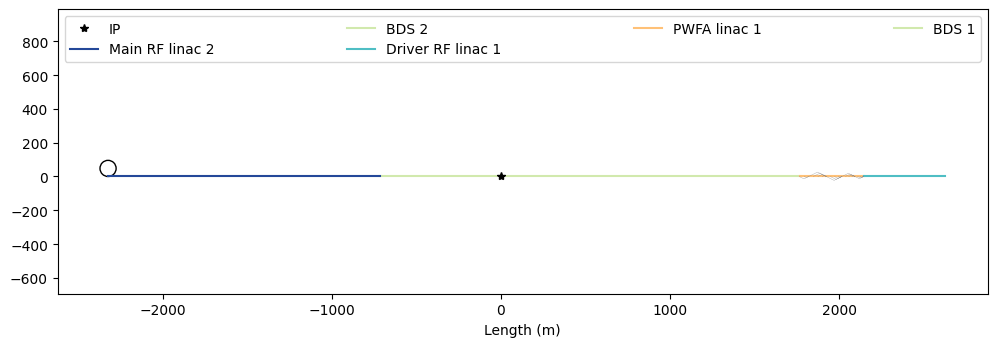

In [5]:
# set collider from best parameters (found above)
opt_collider = ColliderCostModel()
machine_choice(opt_collider, energy_centerofmass)
#collider.combined_driver_positron_linac = True
#collider.use_driver_turnaround = True
opt_collider.set_parameters(best_parameters)

# plot the layout
opt_collider.plot_layout()

In [10]:
# print everything for the optimized collider
opt_collider.print_all()


ELECTRON/POSITRON BUNCH PARAMETERS:
>> Electron final energy = 308.4 GeV
>> Positron final energy = 50.7 GeV
>> Electron charge = 1.60 nC
>> Positron charge = 4.81 nC
>> Electron norm. emittance = 60.9 x 0.21 mm mrad
>> Positron norm. emittance = 10.0 x 0.04 mm mrad
>> Number of bunches in train = 88
>> Bunch separation = 153.9 ns
>> Bunch train rep. rate = 159.2 Hz
>> Average collision rate = 14.0 kHz

PLASMA WAKE PARAMETERS:
>> Accelerating field          = 2.51 GV/m
>> Wake-to-beam efficiency     = 38%
>> Driver depletion efficiency = 80%
>> Longitudinal energy density = 10.7 J/m
>> Energy absorbed per length  = 4.0 J/m
>> Energy remaining per length = 6.7 J/m
>> Peak decelerating field     = 1.67 GV/m
>> Blowout radius              = 1.85 kp^-1
>> Plasma density              = 1.49e+15 cm^-3
>> Plasma skin depth           = 138 µm
>> Normalized field strength   = 0.68
>> Wavebreaking field          = 3.71 GV/m
>> Norm. transverse wakefield  = 0.056

DRIVE BUNCH PARAMETERS:
>> Driv

## Variation plots

Cost variation

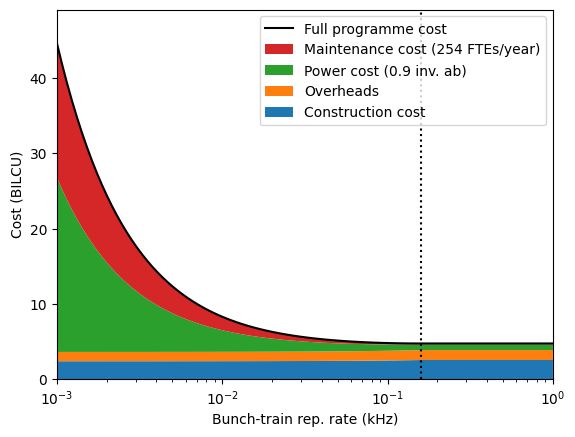

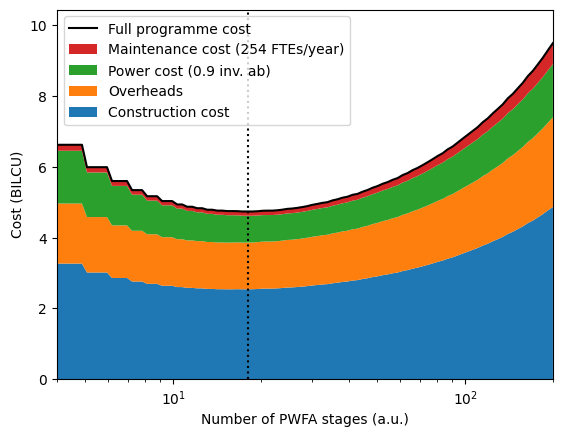

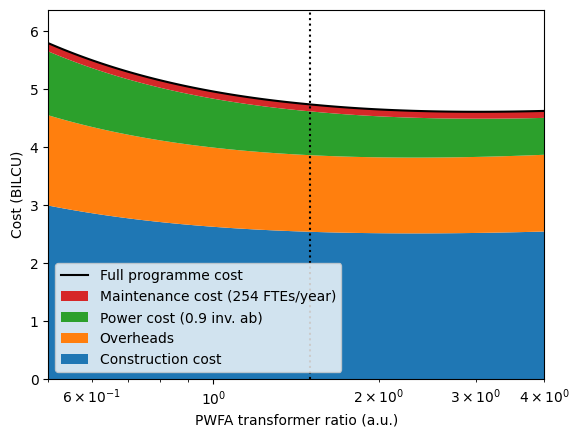

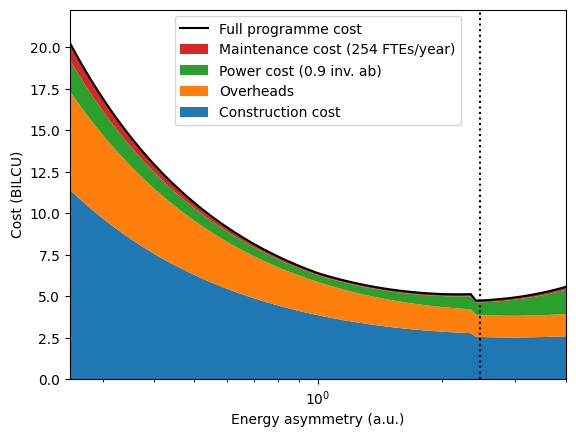

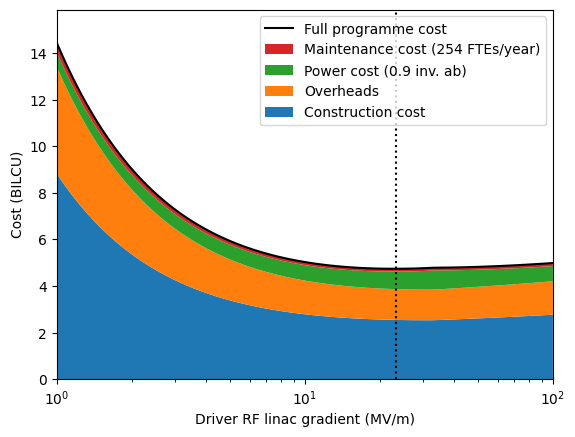

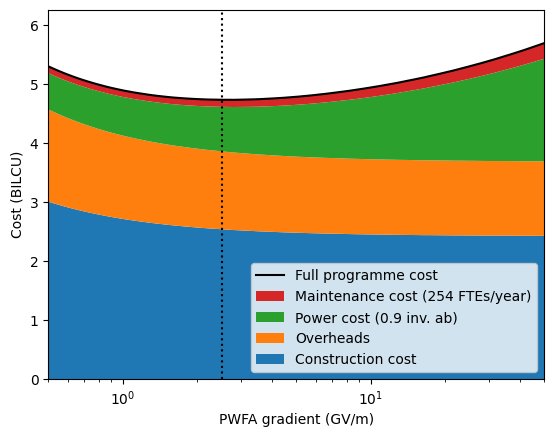

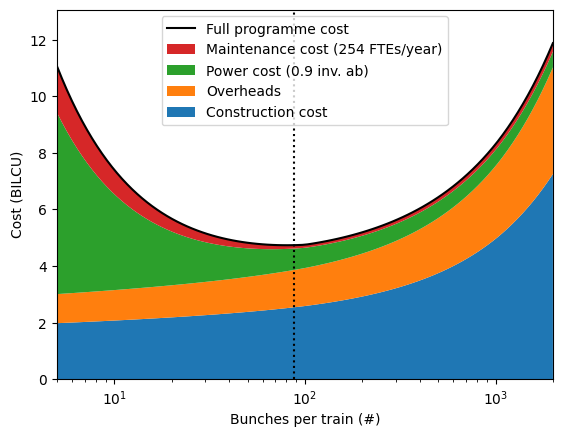

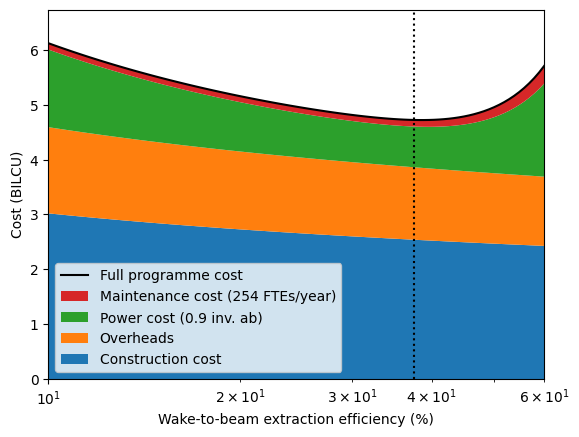

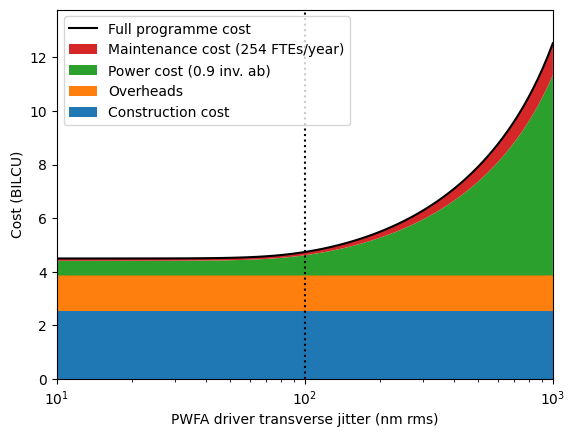

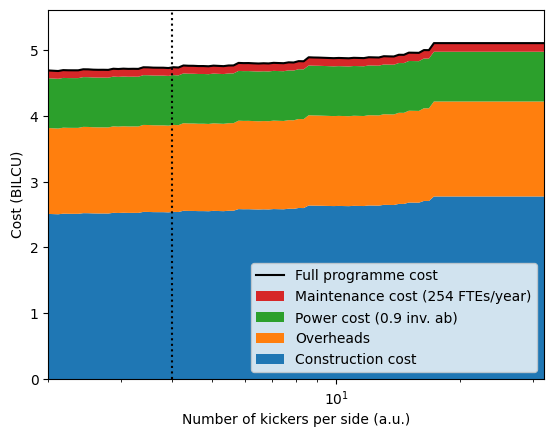

In [7]:
collider = opt_collider
collider.plot_cost_variation('bunch_pattern.reprate_trains', min=1, max=1000, unit='kHz', scale=1000, label='Bunch-train rep. rate')
collider.plot_cost_variation('pwfa.num_stages', min=4, max=200, label='Number of PWFA stages')
collider.plot_cost_variation('pwfa.transformer_ratio', min=0.5, max=4, label='PWFA transformer ratio')
collider.plot_cost_variation('energy_asymmetry', min=0.25, max=4, label='Energy asymmetry')
collider.plot_cost_variation('driver_linac.accel_gradient', min=1e6, max=100e6, unit='MV/m', scale=1e6, label='Driver RF linac gradient')
collider.plot_cost_variation('pwfa.accel_gradient', min=0.5e9, max=50e9, unit='GV/m', scale=1e9, label='PWFA gradient')
collider.plot_cost_variation('bunch_pattern.bunches_per_train', min=5, max=2000, unit='#', label='Bunches per train')
collider.plot_cost_variation('pwfa.extraction_efficiency', min=0.1, max=0.6, unit='%', scale=1e-2, label='Wake-to-beam extraction efficiency')
collider.plot_cost_variation('pwfa.driver_jitter_transverse', min=10e-9, max=1e-6, unit='nm rms', scale=1e-9, label='PWFA driver transverse jitter')
collider.plot_cost_variation('pwfa.kickers_per_side', min=2, max=32, label='Number of kickers per side')

Length variation

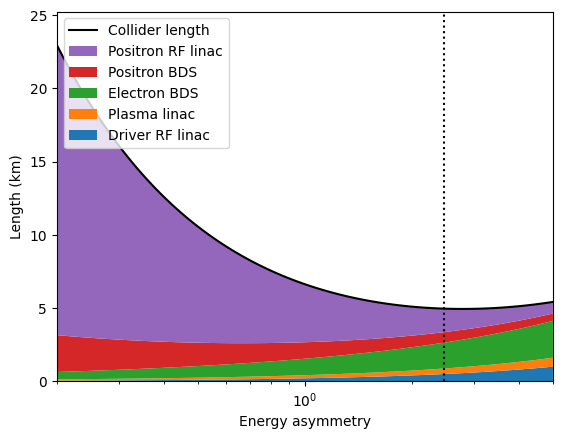

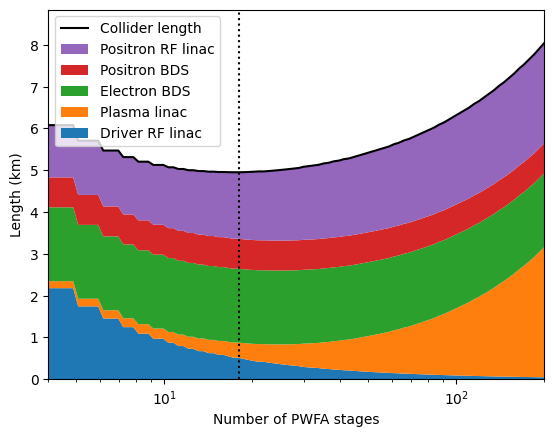

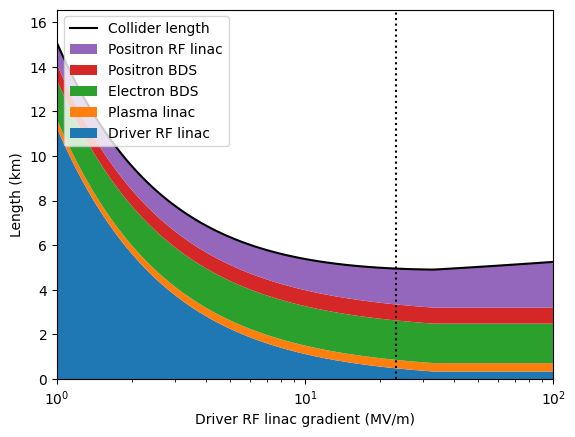

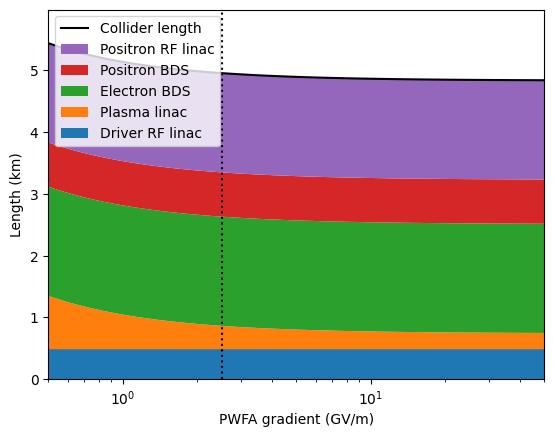

In [8]:
collider.plot_length_variation('energy_asymmetry', min=0.2, max=5, label='Energy asymmetry')
collider.plot_length_variation('pwfa.num_stages', min=4, max=200, label='Number of PWFA stages')
collider.plot_length_variation('driver_linac.accel_gradient', min=1e6, max=100e6, unit='MV/m', scale=1e6, label='Driver RF linac gradient')
collider.plot_length_variation('pwfa.accel_gradient', min=0.5e9, max=50e9, unit='GV/m', scale=1e9, label='PWFA gradient')

Emissions variation

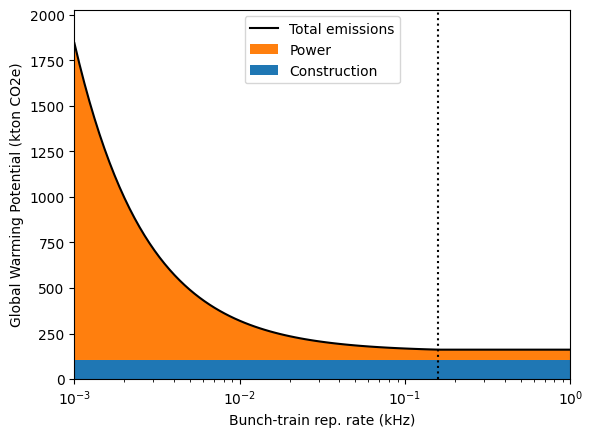

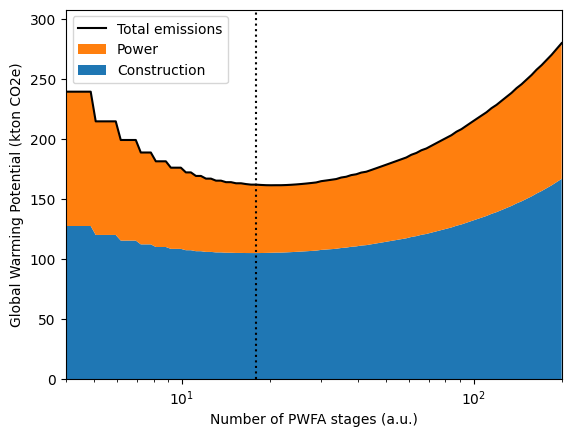

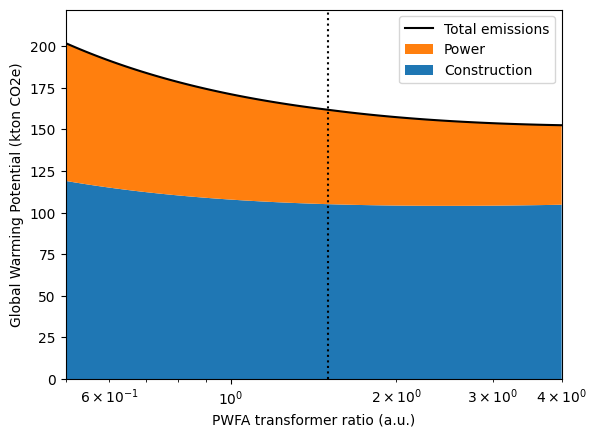

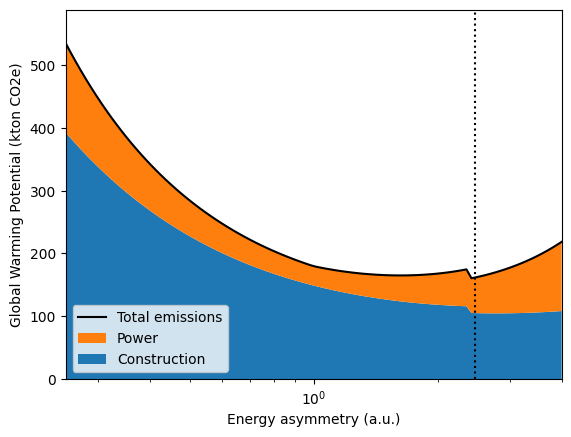

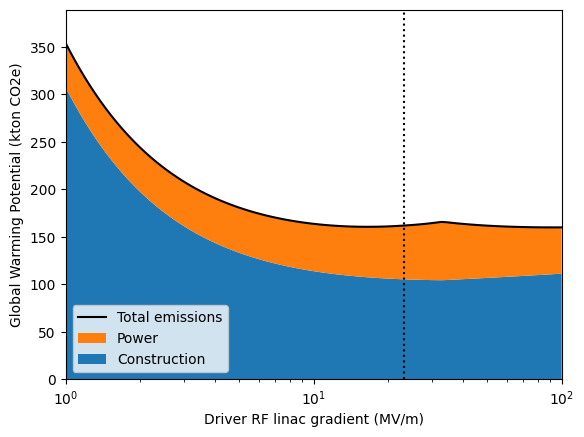

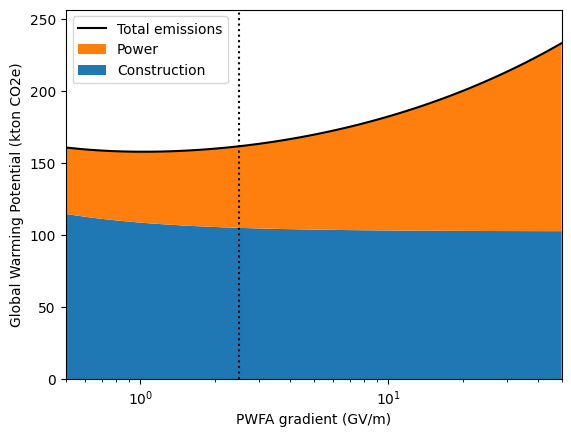

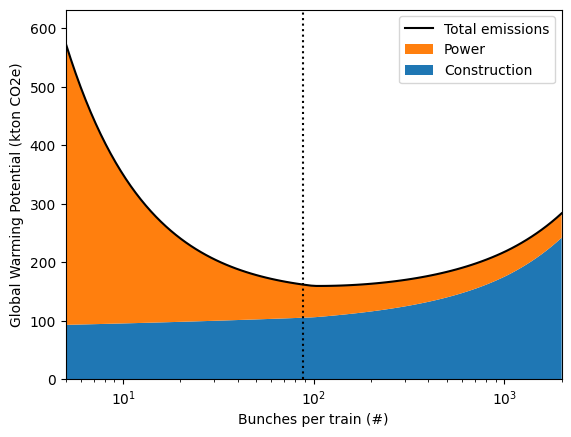

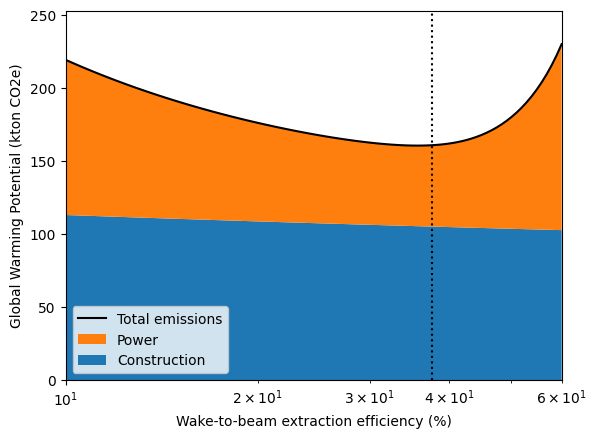

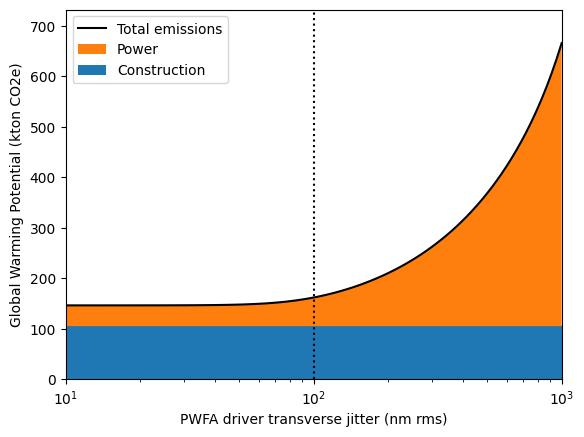

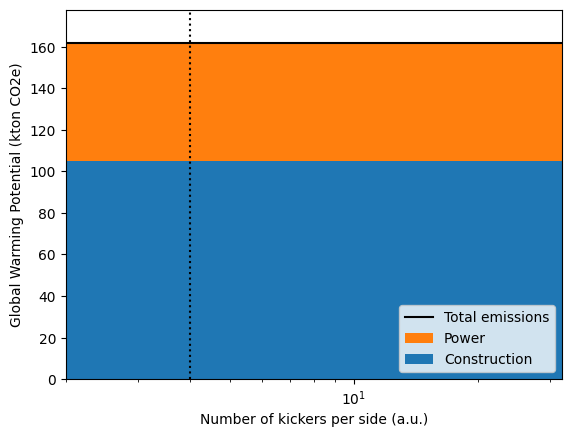

In [9]:
collider.plot_emissions_variation('bunch_pattern.reprate_trains', min=1, max=1000, unit='kHz', scale=1000, label='Bunch-train rep. rate')
collider.plot_emissions_variation('pwfa.num_stages', min=4, max=200, label='Number of PWFA stages')
collider.plot_emissions_variation('pwfa.transformer_ratio', min=0.5, max=4, label='PWFA transformer ratio')
collider.plot_emissions_variation('energy_asymmetry', min=0.25, max=4, label='Energy asymmetry')
collider.plot_emissions_variation('driver_linac.accel_gradient', min=1e6, max=100e6, unit='MV/m', scale=1e6, label='Driver RF linac gradient')
collider.plot_emissions_variation('pwfa.accel_gradient', min=0.5e9, max=50e9, unit='GV/m', scale=1e9, label='PWFA gradient')
collider.plot_emissions_variation('bunch_pattern.bunches_per_train', min=5, max=2000, unit='#', label='Bunches per train')
collider.plot_emissions_variation('pwfa.extraction_efficiency', min=0.1, max=0.6, unit='%', scale=1e-2, label='Wake-to-beam extraction efficiency')
collider.plot_emissions_variation('pwfa.driver_jitter_transverse', min=10e-9, max=1e-6, unit='nm rms', scale=1e-9, label='PWFA driver transverse jitter')
collider.plot_emissions_variation('pwfa.kickers_per_side', min=2, max=32, label='Number of kickers per side')